In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from PIL import Image
import glob
import random
import pandas as pd

In [2]:
files=glob.glob("C:/Users/user/Downloads/hotdog-nothotdog/train/hotdog/*.jpg")
TrainData = []
index = 0

for file in files:
    img = Image.open(file)
    img = img.resize((299, 299))
    imgarray = np.asarray(img)
    TrainData.append((imgarray,1))

files=glob.glob("C:/Users/user/Downloads/hotdog-nothotdog/train/nothotdog/*.jpg")
index = 0
for file in files:
    img = Image.open(file)
    img = img.resize((299, 299))
    imgarray = np.asarray(img)
    TrainData.append((imgarray,0))

print("Done.")

random.shuffle(TrainData)

Done.


In [3]:
files=glob.glob("C:/Users/user/Downloads/hotdog-nothotdog/test/hotdog/*.jpg")
TestData = []
index = 0

for file in files:
    img = Image.open(file)
    img = img.resize((299, 299))
    imgarray = np.asarray(img)
    TestData.append((imgarray,1))

files=glob.glob("C:/Users/user/Downloads/hotdog-nothotdog/test/nothotdog/*.jpg")
index = 0
for file in files:
    img = Image.open(file)
    img = img.resize((299, 299))
    imgarray = np.asarray(img)
    TestData.append((imgarray,0))

print("Done.")

random.shuffle(TestData)

Done.


In [4]:
print("Train Data ",len(TrainData))
print("Test Data ",len(TestData))

Train Data  3000
Test Data  644


In [5]:
Train_X = np.array([item[0] for item in TrainData])
Train_Y = np.array([item[1] for item in TrainData])

Test_X = np.array([item[0] for item in TestData])
Test_Y = np.array([item[1] for item in TestData])

Train_X = Train_X.astype('float32')
Test_X = Test_X.astype('float32')

Train_X /= 255
Test_X /= 255

In [6]:
model = keras.Sequential([
    keras.layers.AveragePooling2D((2,2),2,input_shape=(299,299,3)),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.1),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])



In [7]:
model.compile(optimizer ='adam',loss=keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [8]:
model.fit(Train_X, Train_Y, epochs = 50, batch_size = 100)

Epoch 1/50
30/30 [==============================] - 106s 3s/step - loss: 0.6958 - accuracy: 0.5040
Epoch 2/50
30/30 [==============================] - 89s 3s/step - loss: 0.6775 - accuracy: 0.5957
Epoch 3/50
30/30 [==============================] - 90s 3s/step - loss: 0.6401 - accuracy: 0.6363
Epoch 4/50
30/30 [==============================] - 90s 3s/step - loss: 0.6255 - accuracy: 0.6640
Epoch 5/50
30/30 [==============================] - 90s 3s/step - loss: 0.6197 - accuracy: 0.6643
Epoch 6/50
30/30 [==============================] - 90s 3s/step - loss: 0.6141 - accuracy: 0.6593
Epoch 7/50
30/30 [==============================] - 90s 3s/step - loss: 0.6027 - accuracy: 0.6833
Epoch 8/50
30/30 [==============================] - 90s 3s/step - loss: 0.5942 - accuracy: 0.6863
Epoch 9/50
30/30 [==============================] - 90s 3s/step - loss: 0.5773 - accuracy: 0.7020
Epoch 10/50
30/30 [==============================] - 90s 3s/step - loss: 0.5569 - accuracy: 0.7083
Epoch 11/50
30/30 

In [9]:
model.evaluate(Test_X,Test_Y)

21/21 [==============================] - 22s 759ms/step - loss: 0.6837 - accuracy: 0.7624


[0.6836544275283813, 0.7624223828315735]

In [10]:
Test_X

array([[[[0.6431373 , 0.41568628, 0.09411765],
         [0.654902  , 0.4392157 , 0.1254902 ],
         [0.65882355, 0.47058824, 0.17254902],
         ...,
         [0.67058825, 0.49803922, 0.21176471],
         [0.67058825, 0.49803922, 0.21176471],
         [0.67058825, 0.49803922, 0.20392157]],

        [[0.69411767, 0.4745098 , 0.13333334],
         [0.6862745 , 0.48235294, 0.14509805],
         [0.6862745 , 0.5019608 , 0.18039216],
         ...,
         [0.6745098 , 0.5019608 , 0.21568628],
         [0.6745098 , 0.5019608 , 0.21568628],
         [0.6745098 , 0.5019608 , 0.20784314]],

        [[0.72156864, 0.53333336, 0.14117648],
         [0.7058824 , 0.5254902 , 0.14117648],
         [0.70980394, 0.5294118 , 0.15294118],
         ...,
         [0.67058825, 0.49803922, 0.20392157],
         [0.67058825, 0.49803922, 0.20392157],
         [0.67058825, 0.49803922, 0.20392157]],

        ...,

        [[0.8117647 , 0.6862745 , 0.5254902 ],
         [0.26666668, 0.14901961, 0.00784314]

In [11]:
Predictions = model.predict(Test_X)

21/21 [==============================] - 3s 116ms/step


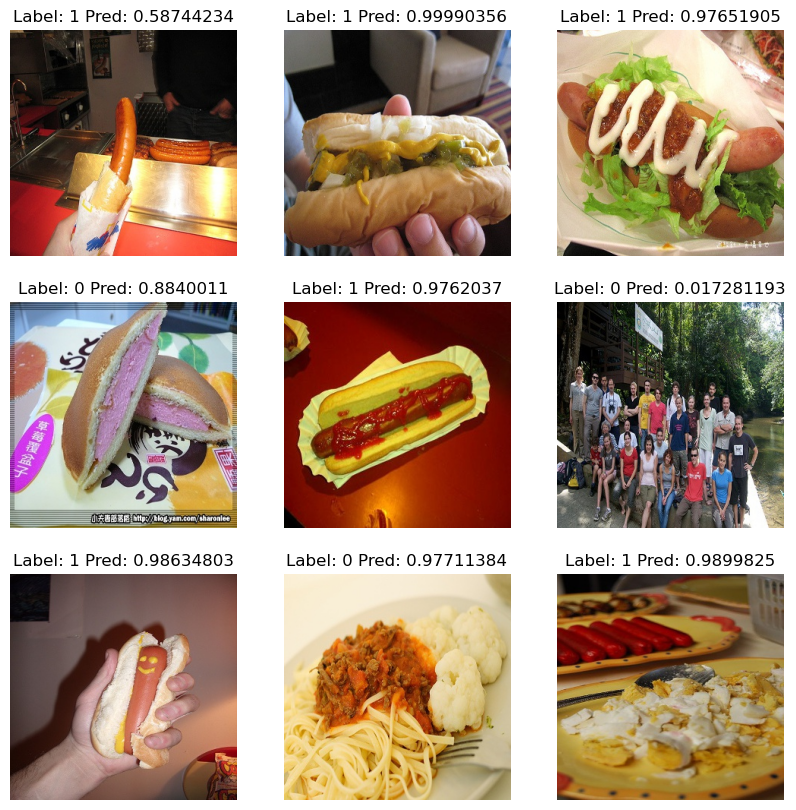

In [12]:
plt.figure(figsize=(10, 10))
a = 95
for i in range(0,9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(Test_X[i+a])
    plt.title("Label: "+str(Test_Y[i+a])+" Pred: "+str(Predictions[i+a][0]))
    plt.axis("off")

In [13]:
model.save('hotdog_model.h5')

In [14]:
from tensorflow import keras
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the trained model
model = keras.models.load_model('hotdog_model.h5')

In [48]:
# Load the new image
img = Image.open('C:/Users/user/Downloads/unsamples/image-30.jpg')

# Preprocess the image
img = img.resize((299, 299))  # Resize to match model's expected input size
img_array = np.array(img)  # Convert image to numpy array
img_array = img_array.astype('float32') / 255  # Normalize pixel values

# Expand dimensions to match model's input shape
img_array = np.expand_dims(img_array, axis=0)

# Perform prediction
prediction = model.predict(img_array)

# The prediction will be a probability, if you have binary classification,
# you may round it to get the predicted class
predicted_class = round(prediction[0][0])

# Print the predicted class
if predicted_class == 1:
    print("Hotdog")
else:
    print("Not hotdog")


1/1 [==============================] - 0s 26ms/step
Hotdog


1/1 [==============================] - 0s 52ms/step


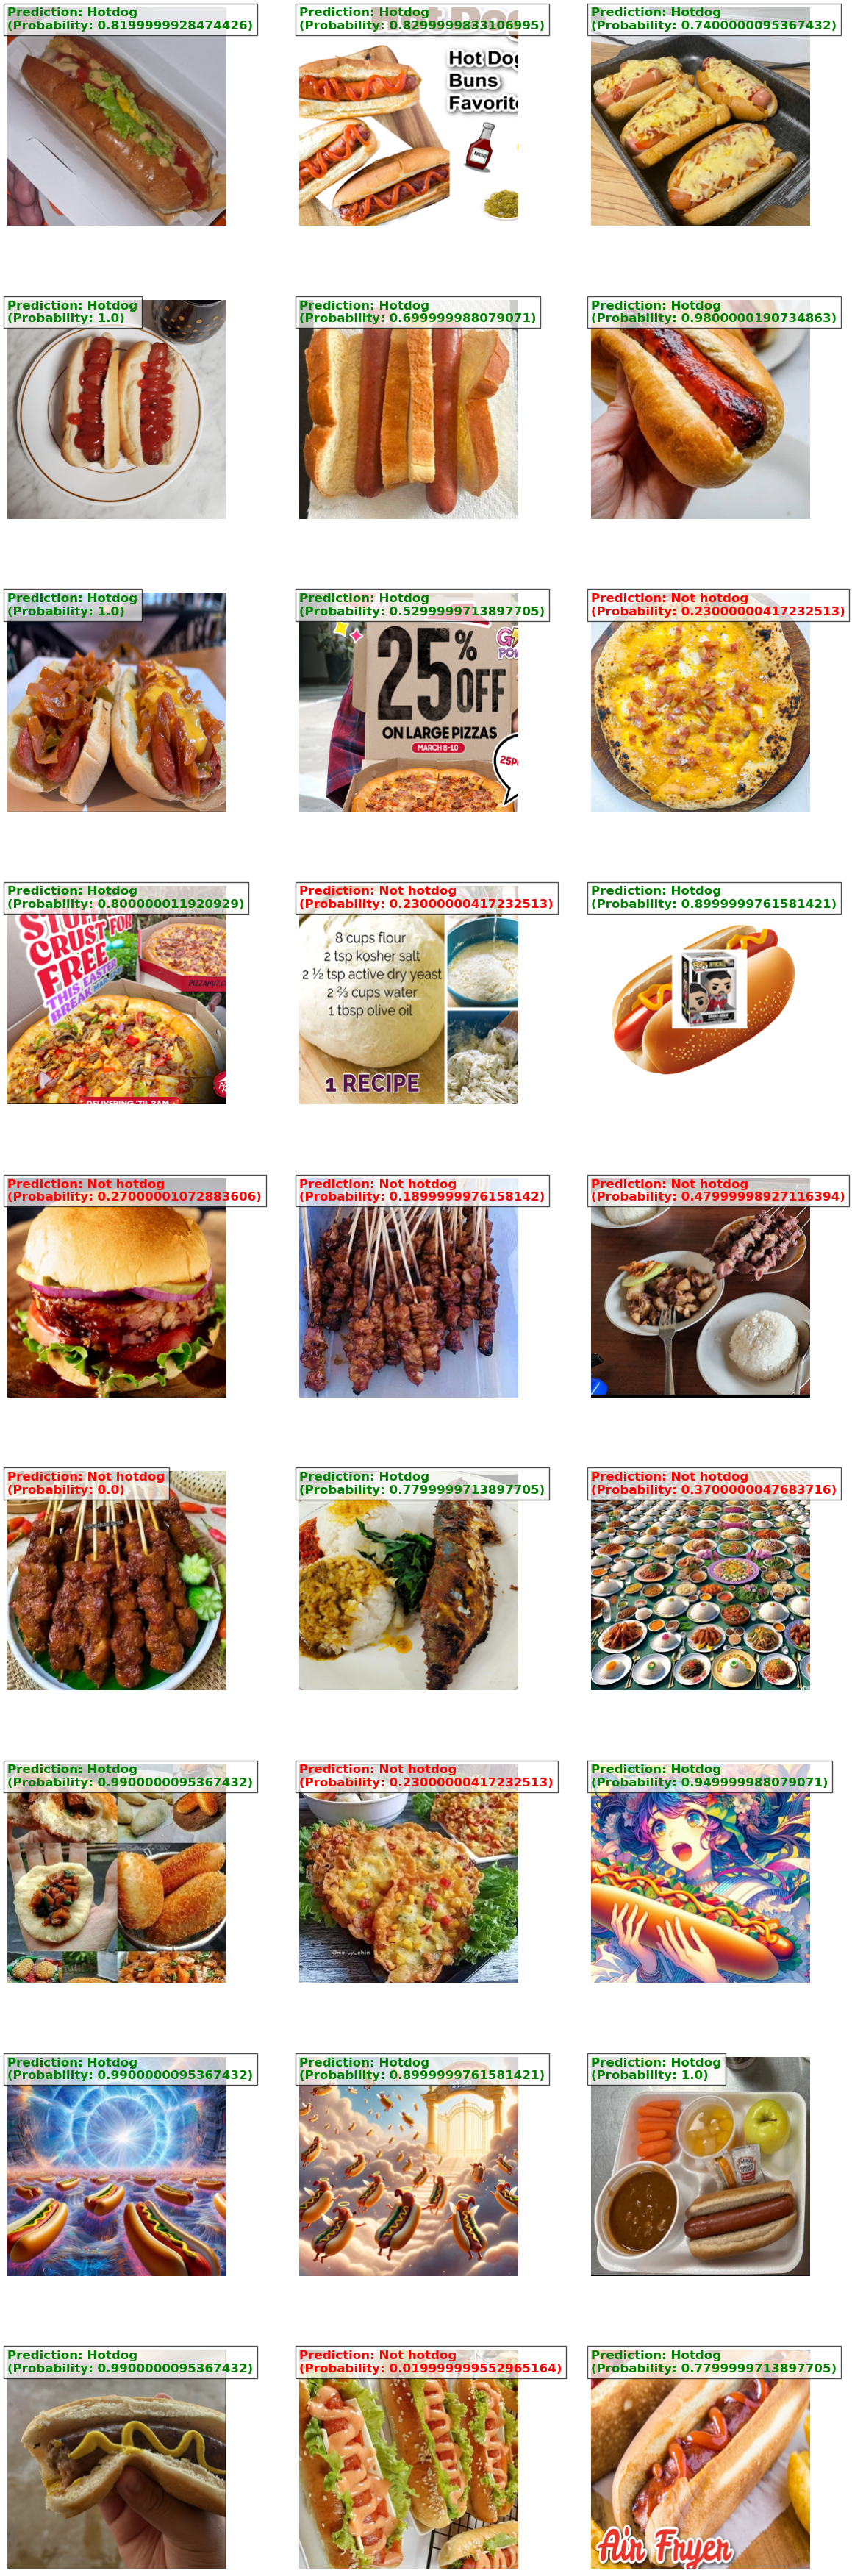

In [63]:
# Path to the folder containing images
folder_path = 'C:/Users/user/Downloads/unsamples'

# Get a list of image files
image_files = [file for file in os.listdir(folder_path) if file.endswith((".jpg", ".jpeg", ".png"))]

# Calculate the number of rows needed to display images in 3 columns
num_images = len(image_files)
num_rows = (num_images + 2) // 3  # Add 2 to round up to the nearest integer

# Create a figure and axis objects
fig, axes = plt.subplots(num_rows, 3, figsize=(12, num_rows * 4))

# Iterate through all images in the folder
for i, filename in enumerate(image_files):
    # Load the image
    img_path = os.path.join(folder_path, filename)
    img = Image.open(img_path)

    # Preprocess the image
    img = img.resize((299, 299))  # Resize to match model's expected input size
    img_array = np.array(img)  # Convert image to numpy array
    img_array = img_array.astype('float32') / 255  # Normalize pixel values

    # Expand dimensions to match model's input shape
    img_array = np.expand_dims(img_array, axis=0)

    # Perform prediction
    prediction = model.predict(img_array)

    # Get the predicted class and probability
    predicted_class = round(prediction[0][0], 2)
    if predicted_class >= 0.5:
        predicted_label = "Hotdog"
        color = "green"
    else:
        predicted_label = "Not hotdog"
        color = "red"

    # Determine subplot position
    row = i // 3
    col = i % 3

    # Display the image
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

    # Add text overlay
    axes[row, col].text(0, 0, f"Prediction: {predicted_label}\n(Probability: {predicted_class})",
                        color=color, fontsize=12, fontweight='bold',
                        bbox=dict(facecolor='white', alpha=0.7),
                        verticalalignment='top', horizontalalignment='left')

# Adjust layout
plt.tight_layout()
plt.show()
